# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

## 부품가격 조회사이트에서 필요한 정보 파싱
- <a href='http://221.143.43.214/'>스카니아 부품가격 조회</a>
- 브랜드별 SCANIA, HINO 검색정보 리스트 가져오기
- 컬럼정보 : 적용일, 순번, 브랜드, 부품그룹, 부품번호, 부품명(한글), 부품명(영문), 가격(VAT별도)


## 스카니아 부품가격정보 크롤링

In [1]:
from selenium import webdriver as wd
from bs4 import BeautifulSoup as bs

from selenium.webdriver.common.by import By

# 명시적 대기를 위해
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from IPython.display import Image

import numpy as np
import pandas as pd
import platform
import time
import sys

### <font color='brown'>WebDriver 로드</font>
> 크롬 웹드라이브 다운 : https://chromedriver.storage.googleapis.com/index.html?path=2.40/
- 셀레니움이 하는 일은 사림이 하는일과 최대한 유사하게 동작하도록 작업
- 차후 -> 옵션 부여하여 (프록시, 에이전트 조작, 이미지를 배제)
- 크롤링을 오래 돌리면 => 임시파일들이 쌓인다!!
- 1주일정도 돌리다보면 느껴진다. Temp에 막 쌓이므로 -> Temp 파일 삭제


In [4]:
# 드라이브 로드
if platform.system() == 'Darwin':    # MacOS
    driver = wd.Chrome(executable_path='./driver/chromedriver')      
elif platform.system() == 'Windows': # Windows
    driver = wd.Chrome(executable_path='./driver/chromedriver.exe')    
else:
    print("It's unknown system. Hangul fonts are not supported!")

In [6]:
target_url = 'http://221.143.43.214/'
brend_keyword = 'SCANIA'    # SCANIA or HINO

In [5]:
# 사이트 접속 (get) : 셀레니움이 하는 일은 사림이 하는일과 최대한 유사하게 동작하도록 작업
# time.sleep(2)
driver.get(target_url)

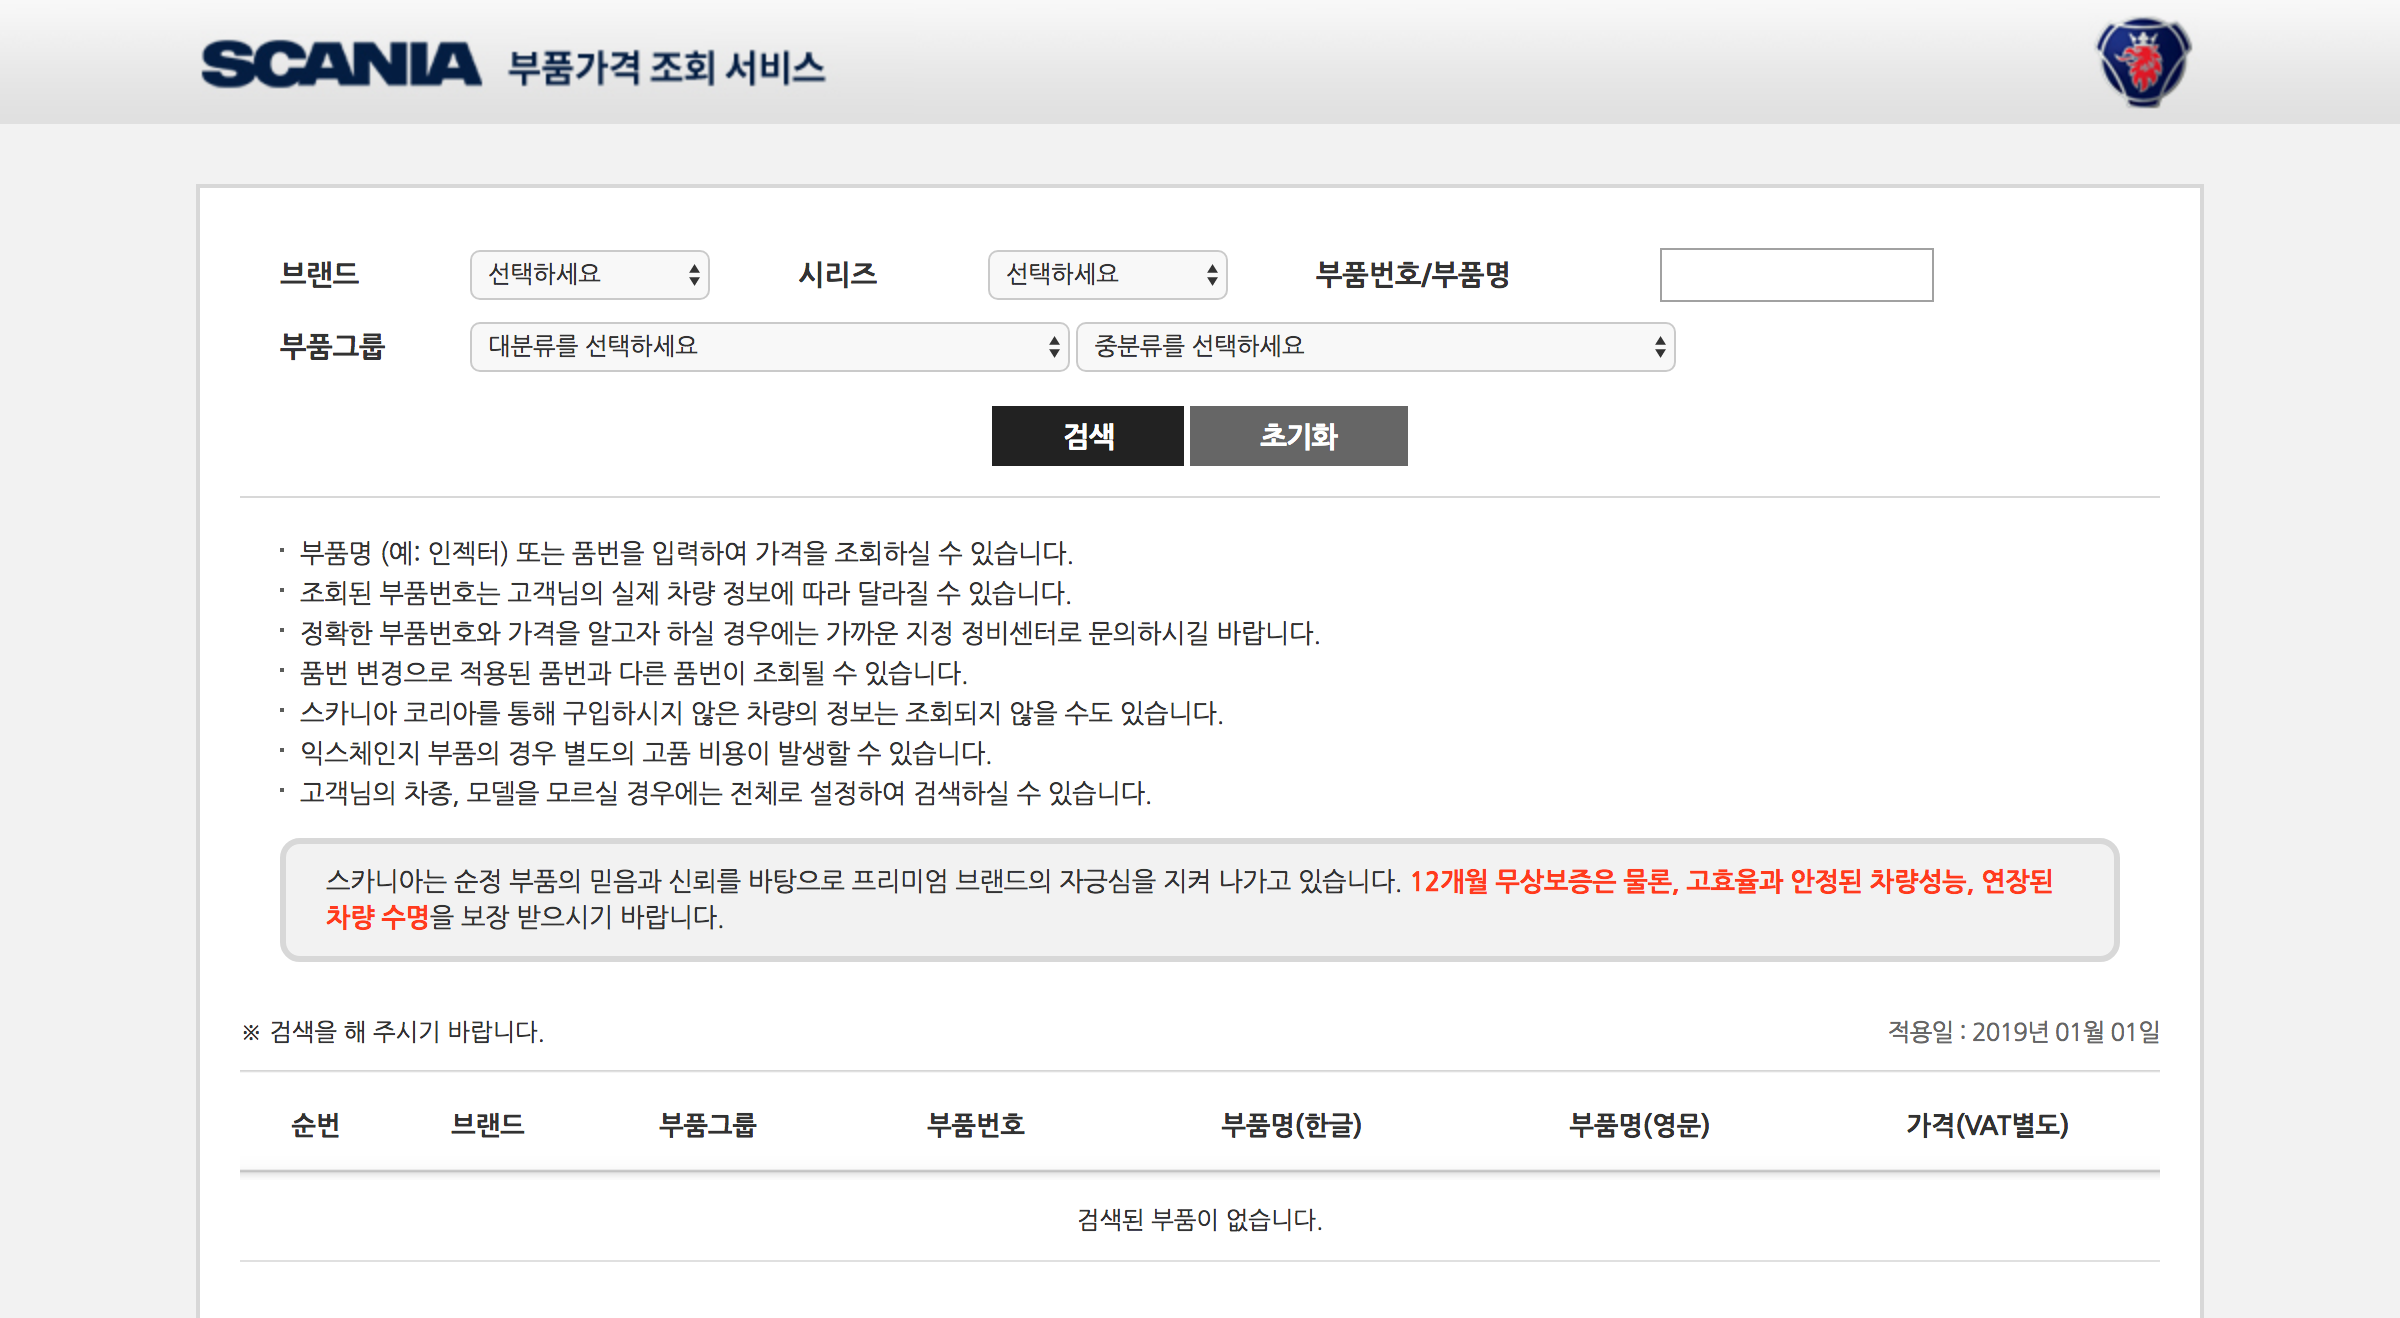

In [10]:
capture_img = './images/istarbucks.png'
driver.save_screenshot(capture_img)
Image(capture_img)

In [11]:
html = driver.page_source
soup = bs(html, "lxml")
soup.title

<title>스카니아 부품가격 조회 서비스</title>

In [12]:
brend_keyword = 'SCANIA'    # SCANIA or HINO
driver.find_element_by_css_selector('#brend').send_keys(brend_keyword)

In [13]:
# 검색 버튼 클릭
search_btn = '#con2 > div > div.search2 > form > fieldset > table > tbody > tr:nth-child(3) > td > button'
driver.find_element_by_css_selector(search_btn).click()

In [15]:
html = driver.page_source
soup = bs(html, "lxml")
soup.title

<title>스카니아 부품가격 조회 서비스</title>

In [18]:
result_cnt = soup.find('span', 'fcop4').get_text()
result_cnt = int(result_cnt)
result_cnt

24525

In [22]:
last_page = int(result_cnt / 15)
last_page

1635

In [23]:
page_url = 'http://221.143.43.214/index.html?page={}&key=Y&brend={}&series2=&&series3=&part_no=&type1=&type2='
param_page  = last_page
param_brend = 'SCANIA'

In [25]:
driver.get(page_url.format(1, param_brend))

In [ ]:
html = driver.page_source
soup = bs(html, "lxml")
soup.title

In [40]:
table_tag = soup.find('table', 'tbl2')
table_tag

<table class="tbl2">
<caption>
					검색결과
					</caption>
<colgroup>
<col width="8%"/>
<col width="10%"/>
<col width="13%"/>
<col width="15%"/>
<col width="18%"/>
<col width="*"/>
<col width="18%"/>
</colgroup>
<thead>
<tr>
<th>순번</th>
<th>브랜드</th>
<th>부품그룹</th>
<th>부품번호</th>
<th>부품명(한글)</th>
<th>부품명(영문)</th>
<th>가격(VAT별도)</th>
</tr>
</thead>
<tbody>
<tr>
<td>
									1								</td>
<td>
									SCANIA								</td>
<td>13. 조임장치및가스켓</td>
<td>1752309</td>
<td>스터드</td>
<td>STUD</td>
<!--<td>\18</td>-->
<td>\ 18,600</td>
</tr>
<tr>
<td>
									2								</td>
<td>
									SCANIA								</td>
<td>10. 캐빈관련</td>
<td>2082014</td>
<td>모델 뱃지</td>
<td>MODEL BADGE</td>
<!--<td>\66</td>-->
<td>\ 66,000</td>
</tr>
<tr>
<td>
									3								</td>
<td>
									SCANIA								</td>
<td>3. 연료시스템</td>
<td>1851717</td>
<td>압력 조절장치</td>
<td>PRESSURE REGULATOR</td>
<!--<td>\114</td>-->
<td>\ 114,000</td>
</tr>
<tr>
<td>
									4								</td>
<td>
									SCANIA								</td>
<td>10. 캐빈관련</td>
<td>270

In [41]:
tbody_tag = table_tag.find('tbody')
# tbody_tag

In [42]:
tr_tags = tbody_tag.find_all('tr')
tr_cnt = len(tr_tags)
tr_cnt

15

In [45]:
td_tags = tr_tags[0].find_all('td')
td_cnt = len(td_tags)
td_cnt

7

In [53]:
# 순번, ord_no
td_tags_0 = td_tags[0].get_text()
td_tags_0 = td_tags_0.strip()
td_tags_0

'1'

In [56]:
# 브랜드, brand
td_tags_1 = td_tags[1].get_text()
td_tags_1 = td_tags_1.strip()
td_tags_1

'SCANIA'

In [58]:
# 부품그룹, device_grp
td_tags_2 = td_tags[2].get_text()
td_tags_2 = td_tags_2.strip()
td_tags_2

'13. 조임장치및가스켓'

In [59]:
# 부품번호, device_no
td_tags_3 = td_tags[3].get_text()
td_tags_3 = td_tags_3.strip()
td_tags_3

'1752309'

In [60]:
# 부품명(한글), device_nm_kr
td_tags_4 = td_tags[4].get_text()
td_tags_4 = td_tags_4.strip()
td_tags_4

'스터드'

In [61]:
# 부품명(영문), device_nm_en
td_tags_5 = td_tags[5].get_text()
td_tags_5 = td_tags_5.strip()
td_tags_5

'STUD'

In [68]:
# 가격(VAT별도), price
td_tags_6 = td_tags[6].get_text()
td_tags_6 = td_tags_6.replace(',', '')
td_tags_6 = td_tags_6.replace('\\', '')
td_tags_6 = td_tags_6.strip()
td_tags_6 = int(td_tags_6)
td_tags_6

18600

In [46]:
# 컬럼정보 : 순번, 브랜드, 부품그룹, 부품번호, 부품명(한글), 부품명(영문), 가격(VAT별도)
# Column : ord_no, brand, device_grp, device_no, device_nm_kr, device_nm_en, price

In [84]:
def get_device_info(td_tags):
    device_info = list()
    td_tags_0 = td_tags[0].get_text().strip()    # 순번, ord_no
    td_tags_1 = td_tags[1].get_text().strip()    # 브랜드, brand
    td_tags_2 = td_tags[2].get_text().strip()    # 부품그룹, device_grp
    td_tags_3 = td_tags[3].get_text().strip()    # 부품번호, device_no
    td_tags_4 = td_tags[4].get_text().strip()    # 부품명(한글), device_nm_kr
    td_tags_5 = td_tags[5].get_text().strip()    # 부품명(영문), device_nm_en
    td_tags_6 = td_tags[6].get_text().strip()    # 가격(VAT별도), price
    td_tags_6 = td_tags_6.replace(',', '')
    td_tags_6 = td_tags_6.replace('\\', '')
    td_tags_6 = td_tags_6.strip()
    
    # 숫자형
    td_tags_0 = int(td_tags_0)
    td_tags_6 = int(td_tags_6)
    
    device_info.append(td_tags_0)
    device_info.append(td_tags_1)
    device_info.append(td_tags_2)
    device_info.append(td_tags_3)
    device_info.append(td_tags_4)
    device_info.append(td_tags_5)
    device_info.append(td_tags_6)
    
    return device_info


In [85]:
device_info = get_device_info(td_tags)
device_info

[1, 'SCANIA', '13. 조임장치및가스켓', '1752309', '스터드', 'STUD', 18600]

In [88]:
def get_device_info(td_tags):
    device_info = dict()
    td_tags_0 = td_tags[0].get_text().strip()    # 순번, ord_no
    td_tags_1 = td_tags[1].get_text().strip()    # 브랜드, brand
    td_tags_2 = td_tags[2].get_text().strip()    # 부품그룹, device_grp
    td_tags_3 = td_tags[3].get_text().strip()    # 부품번호, device_no
    td_tags_4 = td_tags[4].get_text().strip()    # 부품명(한글), device_nm_kr
    td_tags_5 = td_tags[5].get_text().strip()    # 부품명(영문), device_nm_en
    td_tags_6 = td_tags[6].get_text().strip()    # 가격(VAT별도), price
    td_tags_6 = td_tags_6.replace(',', '')
    td_tags_6 = td_tags_6.replace('\\', '')
    td_tags_6 = td_tags_6.strip()
    
    # 숫자형
    td_tags_0 = int(td_tags_0)
    td_tags_6 = int(td_tags_6)
    
    
    device_info['ord_no'      ] = td_tags_0
    device_info['brand'       ] = td_tags_1
    device_info['device_grp'  ] = td_tags_2
    device_info['device_no'   ] = td_tags_3
    device_info['device_nm_kr'] = td_tags_4
    device_info['device_nm_en'] = td_tags_5
    device_info['price       '] = td_tags_6
    
    return device_info


In [89]:
device_info = get_device_info(td_tags)
device_info

{'ord_no': 1,
 'brand': 'SCANIA',
 'device_grp': '13. 조임장치및가스켓',
 'device_no': '1752309',
 'device_nm_kr': '스터드',
 'device_nm_en': 'STUD',
 'price       ': 18600}